In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from numpy import *
import warnings

In [6]:
warnings.filterwarnings("ignore")

# 1、Load Data

In [7]:
df = pd.read_csv('data.csv')

In [8]:
df['Jeff'] = df['Jeff'].str.rstrip('%').astype('float')/ 100.0

In [9]:
df

,Project,PL Hours,FMC,Bumper Tools,IP Tools,MAP,ELP,HMIN,HCM,HDM,HMA,HGT,HRA,One Plant,Two Plants,Three Plants,Total Plants,Global,Jeff
0,15 CRV MMC-PO(R3NB 1085E),1531.20,0,9,6,0,1,0,1,1,0,1,0,0,0,1,3,1,0.00
1,15.5 ILX MMC-PO (R3NB 1073E),262.25,0,2,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0.93
2,16 Pilot FMC-PO (R3NB0077E),611.10,1,2,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0.00
3,16 RDX MMC-PO (R3NB 1030E),347.10,0,3,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0.59
4,16.5M MDX MMC-PO (R3NB1037E),789.55,0,3,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0.00
5,16.5M RIDGELINE FMC-PO (R3NB 1036E),584.00,1,3,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0.33
6,16M ACCORD MMC-PO-2D(R3NB 1032E)(2D 4D),489.75,0,4,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0.93
7,16 M CIVIC FMC-PO,1549.95,1,6,14,0,0,1,1,0,0,1,0,0,1,0,2,1,0.00
8,16M CIVIC FMC-PO-Si (R3NB 1008E - 5D),189.50,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0.00
9,17M CRV FMC,1402.00,1,8,14,0,1,0,1,0,0,1,0,0,1,0,2,1,0.98


In [10]:
Data = df.drop(['HRA','One Plant','Two Plants','Three Plants'], axis =1)

In [11]:
Data.to_numpy()

array([['15 CRV MMC-PO(R3NB 1085E)', 1531.2, 0, 9, 6, 0, 1, 0, 1, 1, 0,
        1, 3, 1, 0.0],
       ['15.5 ILX MMC-PO (R3NB 1073E)', 262.25, 0, 2, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 0.93],
       ['16 Pilot FMC-PO (R3NB0077E)', 611.1, 1, 2, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0.0],
       ['16 RDX MMC-PO (R3NB 1030E)', 347.1, 0, 3, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0.59],
       ['16.5M MDX MMC-PO (R3NB1037E)', 789.55, 0, 3, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0.0],
       ['16.5M RIDGELINE FMC-PO (R3NB 1036E)', 584.0, 1, 3, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0.33],
       ['16M ACCORD MMC-PO-2D(R3NB 1032E)(2D 4D)', 489.75, 0, 4, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 0.93],
       ['16 M CIVIC FMC-PO', 1549.95, 1, 6, 14, 0, 0, 1, 1, 0, 0, 1, 2,
        1, 0.0],
       ['16M CIVIC FMC-PO-Si (R3NB 1008E - 5D)', 189.5, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 0.0],
       ['17M CRV FMC', 1402.0, 1, 8, 14, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0.98],
       ['17M ODYSSEY FMC-PO', 5

In [12]:
Y=Data.iloc[:,1]

In [13]:
X=Data.iloc[:,2:18]

In [14]:
X = sm.add_constant(X, prepend = False) # add constant term

In [15]:
model = sm.OLS(Y,X)
results = model.fit()
results.params

FMC             184.040092
Bumper Tools    138.471307
IP Tools         23.636692
MAP              52.355030
ELP             293.787511
HMIN            361.199298
HCM            -353.928057
HDM             -50.672599
HMA            -321.742310
HGT            -289.673947
Total Plants    -19.001128
Global          113.313328
Jeff           -551.083460
const           508.453485
dtype: float64

In [16]:
results.tvalues

FMC             1.484743
Bumper Tools    6.038516
IP Tools        1.319039
MAP             0.360901
ELP             2.188589
HMIN            2.504491
HCM            -2.690312
HDM            -0.352157
HMA            -1.472955
HGT            -1.008262
Total Plants   -0.127413
Global          0.527790
Jeff           -4.359495
const           1.566421
dtype: float64

In [17]:
Y

0     1531.20
1      262.25
2      611.10
3      347.10
4      789.55
5      584.00
6      489.75
7     1549.95
8      189.50
9     1402.00
10     560.50
11    1209.54
12    1439.45
13     818.75
14     477.00
15     560.50
16     956.00
17     283.00
18     348.50
19    1311.25
Name: PL Hours, dtype: float64

In [18]:
X

,FMC,Bumper Tools,IP Tools,MAP,ELP,HMIN,HCM,HDM,HMA,HGT,Total Plants,Global,Jeff,const
0,0,9,6,0,1,0,1,1,0,1,3,1,0.00,1.0
1,0,2,0,0,0,1,0,0,0,1,1,0,0.93,1.0
2,1,2,0,0,0,0,0,0,1,0,1,0,0.00,1.0
3,0,3,0,0,1,0,0,0,0,1,1,0,0.59,1.0
4,0,3,0,0,0,0,0,0,1,0,1,0,0.00,1.0
5,1,3,0,0,0,0,0,0,1,0,1,0,0.33,1.0
6,0,4,0,1,0,0,0,0,0,1,1,1,0.93,1.0
7,1,6,14,0,0,1,1,0,0,1,2,1,0.00,1.0
8,1,1,0,0,0,0,1,0,0,1,1,0,0.00,1.0
9,1,8,14,0,1,0,1,0,0,1,2,1,0.98,1.0


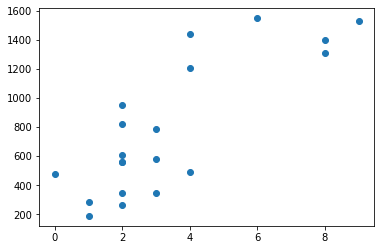

In [19]:
X1=Data.iloc[:,3]
plt.scatter(X1,Y)
plt.show()

# 2、

In [20]:
model1=sm.OLS(pd.DataFrame(Y).astype(float),pd.DataFrame(X).astype(float))
m1=model1.fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:               PL Hours   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     11.75
Date:                Sun, 18 Oct 2020   Prob (F-statistic):            0.00163
Time:                        22:43:51   Log-Likelihood:                -120.06
No. Observations:                  20   AIC:                             266.1
Df Residuals:                       7   BIC:                             279.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
FMC            184.0401    123.954      1.485   

## 2.1 

In [21]:
Data1=Data.drop('Total Plants',axis=1)
X=Data1.iloc[:,2:18]
X=sm.add_constant(X,prepend=False)

In [22]:
X

,FMC,Bumper Tools,IP Tools,MAP,ELP,HMIN,HCM,HDM,HMA,HGT,Global,Jeff,const
0,0,9,6,0,1,0,1,1,0,1,1,0.00,1.0
1,0,2,0,0,0,1,0,0,0,1,0,0.93,1.0
2,1,2,0,0,0,0,0,0,1,0,0,0.00,1.0
3,0,3,0,0,1,0,0,0,0,1,0,0.59,1.0
4,0,3,0,0,0,0,0,0,1,0,0,0.00,1.0
5,1,3,0,0,0,0,0,0,1,0,0,0.33,1.0
6,0,4,0,1,0,0,0,0,0,1,1,0.93,1.0
7,1,6,14,0,0,1,1,0,0,1,1,0.00,1.0
8,1,1,0,0,0,0,1,0,0,1,0,0.00,1.0
9,1,8,14,0,1,0,1,0,0,1,1,0.98,1.0


In [23]:
model1=sm.OLS(pd.DataFrame(Y).astype(float), pd.DataFrame(X).astype(float))
m1=model1.fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:               PL Hours   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     11.75
Date:                Sun, 18 Oct 2020   Prob (F-statistic):            0.00163
Time:                        22:43:51   Log-Likelihood:                -120.06
No. Observations:                  20   AIC:                             266.1
Df Residuals:                       7   BIC:                             279.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
FMC            184.0401    123.954      1.485   

In [24]:
Data2=Data1.drop('MAP',axis=1) #delete HDM
X=Data2.iloc[:,2:18]
X=sm.add_constant(X,prepend=False)

In [25]:
X

,FMC,Bumper Tools,IP Tools,ELP,HMIN,HCM,HDM,HMA,HGT,Global,Jeff,const
0,0,9,6,1,0,1,1,0,1,1,0.00,1.0
1,0,2,0,0,1,0,0,0,1,0,0.93,1.0
2,1,2,0,0,0,0,0,1,0,0,0.00,1.0
3,0,3,0,1,0,0,0,0,1,0,0.59,1.0
4,0,3,0,0,0,0,0,1,0,0,0.00,1.0
5,1,3,0,0,0,0,0,1,0,0,0.33,1.0
6,0,4,0,0,0,0,0,0,1,1,0.93,1.0
7,1,6,14,0,1,1,0,0,1,1,0.00,1.0
8,1,1,0,0,0,1,0,0,1,0,0.00,1.0
9,1,8,14,1,0,1,0,0,1,1,0.98,1.0


In [26]:
model1=sm.OLS(pd.DataFrame(Y).astype(float), pd.DataFrame(X).astype(float))
m1=model1.fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:               PL Hours   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     14.62
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           0.000402
Time:                        22:43:51   Log-Likelihood:                -120.08
No. Observations:                  20   AIC:                             264.2
Df Residuals:                       8   BIC:                             276.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
FMC            181.4126    114.264      1.588   

In [27]:
Data3=Data2.drop('HDM',axis=1) 
X=Data3.iloc[:,2:18]
X=sm.add_constant(X,prepend=False)

In [28]:
model1=sm.OLS(pd.DataFrame(Y).astype(float), pd.DataFrame(X).astype(float))
m1=model1.fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:               PL Hours   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     17.36
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           0.000106
Time:                        22:43:51   Log-Likelihood:                -120.47
No. Observations:                  20   AIC:                             262.9
Df Residuals:                       9   BIC:                             273.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
FMC            199.5089    105.501      1.891   

In [29]:
Data4=Data3.drop('Global',axis=1) 
X=Data4.iloc[:,2:18]
X=sm.add_constant(X,prepend=False)

In [30]:
model1=sm.OLS(pd.DataFrame(Y).astype(float), pd.DataFrame(X).astype(float))
m1=model1.fit()
print(m1.summary())


                            OLS Regression Results                            
Dep. Variable:               PL Hours   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     20.39
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           2.70e-05
Time:                        22:43:51   Log-Likelihood:                -120.95
No. Observations:                  20   AIC:                             261.9
Df Residuals:                      10   BIC:                             271.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
FMC            156.6757     80.745      1.940   

In [31]:
Data5=Data4.drop('HGT',axis=1) 
X=Data5.iloc[:,2:18]
X=sm.add_constant(X,prepend=False)

In [32]:
model1=sm.OLS(pd.DataFrame(Y).astype(float), pd.DataFrame(X).astype(float))
m1=model1.fit()
print(m1.summary())


                            OLS Regression Results                            
Dep. Variable:               PL Hours   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     20.18
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           1.56e-05
Time:                        22:43:51   Log-Likelihood:                -123.05
No. Observations:                  20   AIC:                             264.1
Df Residuals:                      11   BIC:                             273.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
FMC            125.3038     82.756      1.514   

In [33]:
Data6=Data5.drop('FMC',axis=1) 
X=Data6.iloc[:,2:18]
X=sm.add_constant(X,prepend=False)

model1=sm.OLS(pd.DataFrame(Y).astype(float), pd.DataFrame(X).astype(float))
m1=model1.fit()
print(m1.summary())


                            OLS Regression Results                            
Dep. Variable:               PL Hours   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     20.52
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           8.83e-06
Time:                        22:43:51   Log-Likelihood:                -124.95
No. Observations:                  20   AIC:                             265.9
Df Residuals:                      12   BIC:                             273.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Bumper Tools   139.7783     20.059      6.969   

In [34]:
Data7=Data6.drop('ELP',axis=1) 
X=Data7.iloc[:,2:18]
X=sm.add_constant(X,prepend=False)

model1=sm.OLS(pd.DataFrame(Y).astype(float), pd.DataFrame(X).astype(float))
m1=model1.fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:               PL Hours   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     22.28
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           3.92e-06
Time:                        22:43:51   Log-Likelihood:                -126.34
No. Observations:                  20   AIC:                             266.7
Df Residuals:                      13   BIC:                             273.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Bumper Tools   145.8850     20.118      7.251   

In [46]:
Data8=Data7.drop('HMIN',axis=1) 
X=Data8.iloc[:,2:18]
X=sm.add_constant(X,prepend=False)

model1=sm.OLS(pd.DataFrame(Y).astype(float), pd.DataFrame(X).astype(float))
m1=model1.fit()
print(m1.summary())
#ALL GOOD

                            OLS Regression Results                            
Dep. Variable:               PL Hours   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     25.82
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           1.34e-06
Time:                        22:44:44   Log-Likelihood:                -127.33
No. Observations:                  20   AIC:                             266.7
Df Residuals:                      14   BIC:                             272.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Bumper Tools   135.7747     18.371      7.391   

# 3、

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [37]:
model2=LinearRegression()
model2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
model2.coef_    

array([ 115.57439682,   37.32264023, -245.07362318, -295.84345589,
       -555.53414978,    0.        ])

In [39]:
model2.intercept_    

625.9113289130067

In [40]:
model2.score(x_test,y_test)

-1.5113778150633936

In [41]:
y_predict=model2.predict(x_test)
y_all_predict=model2.predict(X)

In [42]:
dic1 = {'test':    Y,
        'predict': y_all_predict, 
        'compare': list((Y))-np.array(y_all_predict)}  
dic= pd.DataFrame(dic1)

In [43]:
print(dic, '\n')

       test      predict     compare
0   1531.20  1644.943119 -113.743119
1    262.25   340.413363  -78.163363
2    611.10   561.216667   49.883333
3    347.10   644.869371 -297.769371
4    789.55   676.791063  112.758937
5    584.00   493.464794   90.535206
6    489.75   571.562157  -81.812157
7   1549.95  1596.801050  -46.851050
8    189.50   496.412103 -306.912103
9   1402.00  1283.526377  118.473623
10   560.50   561.216667   -0.716667
11  1209.54  1386.790038 -177.250038
12  1439.45  1162.854197  276.595803
13   818.75   857.060123  -38.310123
14   477.00   440.696574   36.303426
15   560.50   857.060123 -296.560123
16   956.00   857.060123   98.939877
17   283.00   445.642270 -162.642270
18   348.50   561.216667 -212.716667
19  1311.25  1305.432880    5.817120 



In [44]:
xx=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

Text(0.5, 0, 'Compare')

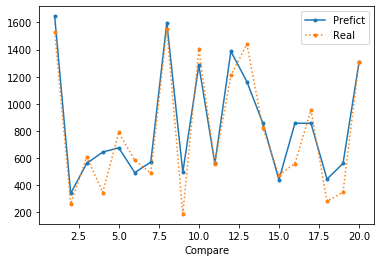

In [45]:
plt.plot(xx, y_all_predict, '.-', label=r"Prefict")
plt.plot(xx, Y, '.:', label=r"Real")
plt.legend()
plt.xlabel("Compare")